In [1]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import time
from supplementary_code import *

In [2]:
nq = 10
depth = int(nq/2)
dev = qml.device("default.qubit", wires= nq) 

In [3]:
Delta = 1.7
H = H_XXZ(Delta,wires=range(nq))

print(H)

  (1) [X0 X1]
+ (1) [Y0 Y1]
+ (1) [X1 X2]
+ (1) [Y1 Y2]
+ (1) [X2 X3]
+ (1) [Y2 Y3]
+ (1) [X3 X4]
+ (1) [Y3 Y4]
+ (1) [X4 X5]
+ (1) [Y4 Y5]
+ (1) [X5 X6]
+ (1) [Y5 Y6]
+ (1) [X6 X7]
+ (1) [Y6 Y7]
+ (1) [X7 X8]
+ (1) [Y7 Y8]
+ (1) [X8 X9]
+ (1) [Y8 Y9]
+ (1) [X9 X0]
+ (1) [Y9 Y0]
+ (1.7) [Z0 Z1]
+ (1.7) [Z1 Z2]
+ (1.7) [Z2 Z3]
+ (1.7) [Z3 Z4]
+ (1.7) [Z4 Z5]
+ (1.7) [Z5 Z6]
+ (1.7) [Z6 Z7]
+ (1.7) [Z7 Z8]
+ (1.7) [Z8 Z9]
+ (1.7) [Z9 Z0]


In [4]:
params = np.array([np.pi for _ in range(4*depth)])

In [5]:
@qml.qnode(dev)
def circuit(params, Delta, depth=depth, nq=nq):
    
    HVA_ansatz(params, Delta, depth, range(nq))
    
    return qml.expval(H)

In [6]:
cost_fn = lambda w: circuit(w, Delta=Delta, depth=depth, nq=nq)

In [7]:
start_time = time.time()    

steps = 200

optimizer = qml.AdamOptimizer(stepsize=0.5)
best_cost = cost_fn(params)
best_params = params

for j in range(steps+1):
    params2 = params
    params, cost = optimizer.step_and_cost(cost_fn, params)

    if cost < best_cost:
        best_params = params2
        best_cost = cost
        
    if j!=0 and j % 2 == 0:
        print(f"Cost at Step {j}: {cost}")

end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 2: -6.446290203631421
Cost at Step 4: -3.822996856479073
Cost at Step 6: -1.937438474381588
Cost at Step 8: -2.677583972068861
Cost at Step 10: -4.319035969897839
Cost at Step 12: -6.085743910789915
Cost at Step 14: -8.155188090096226
Cost at Step 16: -8.367446733340877
Cost at Step 18: -9.819270962624026
Cost at Step 20: -12.606679971737364
Cost at Step 22: -12.59294317626941
Cost at Step 24: -13.540613929654338
Cost at Step 26: -13.228607091911323
Cost at Step 28: -15.819791560586326
Cost at Step 30: -14.61558834881194
Cost at Step 32: -15.544802899106262
Cost at Step 34: -15.924161092013243
Cost at Step 36: -16.15057491748618
Cost at Step 38: -16.722806826784886
Cost at Step 40: -16.85672192575149
Cost at Step 42: -18.54042598197813
Cost at Step 44: -18.17561881381622
Cost at Step 46: -18.891070803854596
Cost at Step 48: -19.290842034796963
Cost at Step 50: -19.01082609544792
Cost at Step 52: -18.71742121896083
Cost at Step 54: -16.848749207393748
Cost at Step 56: -17.4

In [8]:
print(best_cost)

-22.14342633697915


In [9]:
print(cost_fn(best_params))

-22.14342633697915


In [10]:
print(np.array(best_params))

[5.48715704 3.18873192 1.53597376 0.5916602  1.55973738 3.03028277
 4.25982153 3.74930416 2.40809066 6.23754526 4.81487832 4.92528913
 4.62956309 2.99058749 3.03426358 2.63721673 1.99778422 3.24583313
 0.38249766 6.47298915]


In [11]:
for i in range(1,10):
    
    corr = corr_function(i, best_params,Delta,depth, nq)
    
    print(i,np.abs(corr))

1 0.8501017528287214
2 0.49207226315989744
3 0.5162370263018793
4 0.4599022493949334
5 0.46520065903334895
6 0.45990224939493324
7 0.4511284147693373
8 0.4920722631598973
9 0.621281172176372


In [12]:
# Time evolution

corr_t = []
t = []
i =  3
dt = 1/400

start_time = time.time()    
for step in range(401):
    
    t.append(dt*step)
    
    corr_dt = corr_function(i, best_params, Delta, depth, nq, perturbation='hamiltonian',timesteps=step)
    
    print(step,corr_dt)
    corr_t.append(corr_dt)
    
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

0 -0.5162370263018793
1 -0.5163719317896952
2 -0.5164703608148
3 -0.5165322859608878
4 -0.5165576855573492
5 -0.516546543686613
6 -0.5164988501902438
7 -0.5164146006737895
8 -0.5162937965103827
9 -0.5161364448430887
10 -0.5159425585860036
11 -0.515712156424099
12 -0.5154452628118114
13 -0.5151419079703798
14 -0.5148021278839308
15 -0.5144259642943052
16 -0.5140134646946395
17 -0.5135646823216911
18 -0.5130796761469155
19 -0.5125585108662944
20 -0.5120012568889198
21 -0.5114079903243351
22 -0.5107787929686312
23 -0.5101137522893107
24 -0.5094129614089167
25 -0.5086765190874297
26 -0.5079045297034406
27 -0.5070971032341016
28 -0.5062543552338612
29 -0.5053764068119863
30 -0.5044633846088812
31 -0.5035154207712027
32 -0.5025326529257866
33 -0.501515224152381
34 -0.5004632829552034
35 -0.4993769832333199
36 -0.4982564842498654
37 -0.49710195060009676
38 -0.49591355217830196
39 -0.4946914641435639
40 -0.49343586688439356
41 -0.49214694598223585
42 -0.4908248921738628
43 -0.4894699013126606


339 0.031808837060115835
340 0.031293122038143606
341 0.03076533507758611
342 0.030225659670557542
343 0.029674279103910045
344 0.029111376422130103
345 0.028537134390705265
346 0.027951735459971955
347 0.027355361729447858
348 0.026748194912657453
349 0.02613041630245519
350 0.025502206736855104
351 0.024863746565368938
352 0.02421521561586218
353 0.0235567931619301
354 0.022888657890800718
355 0.022210987871770754
356 0.02152396052517619
357 0.020827752591905918
358 0.02012254010345768
359 0.019408498352546794
360 0.018685801864267104
361 0.01795462436780748
362 0.017215138768731264
363 0.01646751712181846
364 0.015711930604474622
365 0.01494854949071106
366 0.014177543125695496
367 0.01339907990087924
368 0.012613327229701266
369 0.011820451523871456
370 0.01102061817023281
371 0.010213991508210896
372 0.009400734807842925
373 0.008581010248393306
374 0.0077549788975575795
375 0.006922800691249037
376 0.006084634413977386
377 0.005240637679811727
378 0.004390966913934091
379 0.00353

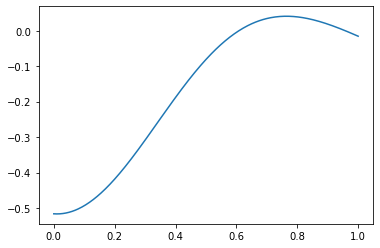

In [14]:
plt.plot(np.linspace(0,1,401),np.real(corr_t))

In [15]:
np.array(corr_t)

tensor([-5.16237026e-01, -5.16371932e-01, -5.16470361e-01,
        -5.16532286e-01, -5.16557686e-01, -5.16546544e-01,
        -5.16498850e-01, -5.16414601e-01, -5.16293797e-01,
        -5.16136445e-01, -5.15942559e-01, -5.15712156e-01,
        -5.15445263e-01, -5.15141908e-01, -5.14802128e-01,
        -5.14425964e-01, -5.14013465e-01, -5.13564682e-01,
        -5.13079676e-01, -5.12558511e-01, -5.12001257e-01,
        -5.11407990e-01, -5.10778793e-01, -5.10113752e-01,
        -5.09412961e-01, -5.08676519e-01, -5.07904530e-01,
        -5.07097103e-01, -5.06254355e-01, -5.05376407e-01,
        -5.04463385e-01, -5.03515421e-01, -5.02532653e-01,
        -5.01515224e-01, -5.00463283e-01, -4.99376983e-01,
        -4.98256484e-01, -4.97101951e-01, -4.95913552e-01,
        -4.94691464e-01, -4.93435867e-01, -4.92146946e-01,
        -4.90824892e-01, -4.89469901e-01, -4.88082174e-01,
        -4.86661917e-01, -4.85209341e-01, -4.83724661e-01,
        -4.82208099e-01, -4.80659880e-01, -4.79080235e-0